In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import Eg_cov as eg
import utils as u

In [2]:
# Parameters
lens = 'DESI'
src = 'LSST'
Pimax=900.
rp0 = 1.5

endfilename = 'EG_cov'

# Use the same cosmological parameters as Shadab's simulations:
h=0.69
OmB = 0.022/h**2

OmM = 0.292

# Using now nonliner bias parameters as fit in Kitanis & White 2022. 
# They fit LTP parameters so we convert these to their Eulerian equivalents.
b1_LPT = 1.333
b2_LPT = 0.514
bs_LPT = 0 # They fix this to 0.

# Convert to Eulerian using the conversions in Chen, Vlah & White 2020 (these use the same convention as Kitanis & White 2022)
b1 = 1.0 + b1_LPT
b2 = b2_LPT + 8./21.*(b1_LPT)
bs = bs_LPT - 2./7*(b1_LPT)

#b1 = 2.03
#b2 = 0.9*(b1-1.0)**2-0.5 # From Fast-PT example notebook which says 
#'(this is a numerical fit to simulation k2Pnl1_regdata, but a relationship of this form is motivated in the spherical collapse picture'
#bs = -4.0/7.0*(b1-1.0) # The 'coevolution value' see Pandey et al. DES Y3 papers

params = {'mu_0': 0., 'sigma_0':0., 'OmB':OmB, 'h':h, 'n_s':0.965, 'A_s':2.115 * 10**(-9),'b':b1, 'OmM': 0.292, 'b_2':b2, 'b_s': bs} 

#Nsamps=100000

print('b1=', b1)
print('b2=', b2)
print('bs=', bs)

# Index of the first bin included in the data vector
ind_bin = 4

b1= 2.333
b2= 1.021809523809524
bs= -0.38085714285714284


Plot the correlation matrix for the joint probes

In [3]:
# Get the rp bins:
rp_bin_c = np.loadtxt('../txtfiles/rp_bins_mid_plot_addSNmat.txt')
rp_bin_edges = u.rp_bin_edges_log(rp_bin_c)

#rp_bin_c = rp_bin_c_raw[4:]
#rp_bin_edges = rp_bin_edges_raw[4:]

In [4]:
print(rp_bin_c)
print(rp_bin_edges)

[ 1.83709466  2.42176242  3.19250463  4.20854074  5.54793718  7.31360558  9.64120984 12.70958983 16.75450244 22.08673575 29.11598823 38.38234769 50.59778848 66.70087562 87.92887875]
[  1.60004256   2.10926689   2.78055529   3.66548575   4.83205129   6.36988417   8.39714273  11.06958999  14.5925616   19.23674266  25.35896563  33.42962733  44.0688315   58.09403408  76.5828519  100.95586057]


In [ ]:
corr = np.loadtxt('../txtfiles/sims_corr_Msolunits_LSSTY1_addSNmat.dat')
cov= np.loadtxt('../txtfiles/sims_cov_Msolunits_LSSTY1_addSNmat.dat')

#corr = np.delete(np.delete(corr_raw, [0,1,2,3,15,16,17,18], axis=0), [0,1,2,3,15,16,17,18], axis=1)
#cov = np.delete(np.delete(cov_raw, [0,1,2,3,15,16,17,18], axis=0), [0,1,2,3,15,16,17,18], axis=1)

print('cov shape=', cov.shape)

cov shape= (31, 31)


/tmp/ipykernel_1830514/450130299.py:5: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(cov), cmap=cmap)


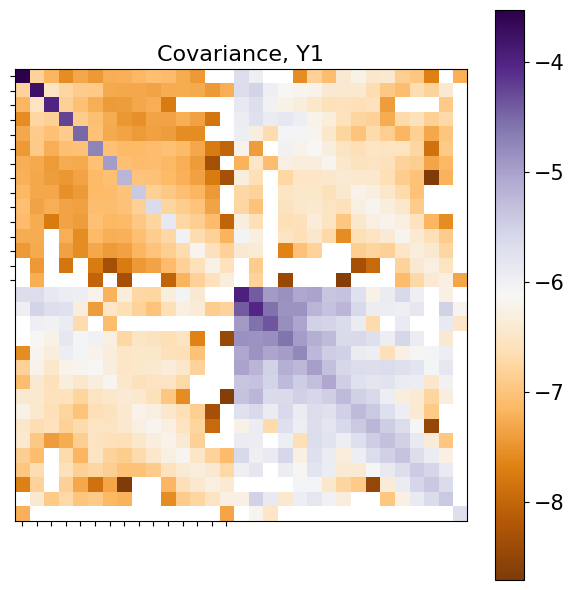

In [6]:
# Visualise the covariance matrix:

cmap = plt.get_cmap('PuOr')
plt.figure(figsize=[6, 6])
plt.imshow(np.log10(cov), cmap=cmap)

# Keep tick positions but remove labels
num_bins = len(rp_bin_c)
tick_positions = np.arange(num_bins)

plt.xticks(tick_positions, [''] * num_bins, fontsize=15)
plt.yticks(tick_positions, [''] * num_bins, fontsize=15)

# Axis labels with units
#plt.xlabel(r"$r_p$ [$\mathrm{Mpc}/h$]", fontsize=16)
#plt.ylabel(r"$r_p$ [$\mathrm{Mpc}/h$]", fontsize=16)

# Colorbar
cbar2 = plt.colorbar()
cbar2.ax.tick_params(labelsize=15)
plt.title('Covariance, Y1', fontsize=16)
plt.tight_layout()
plt.show()

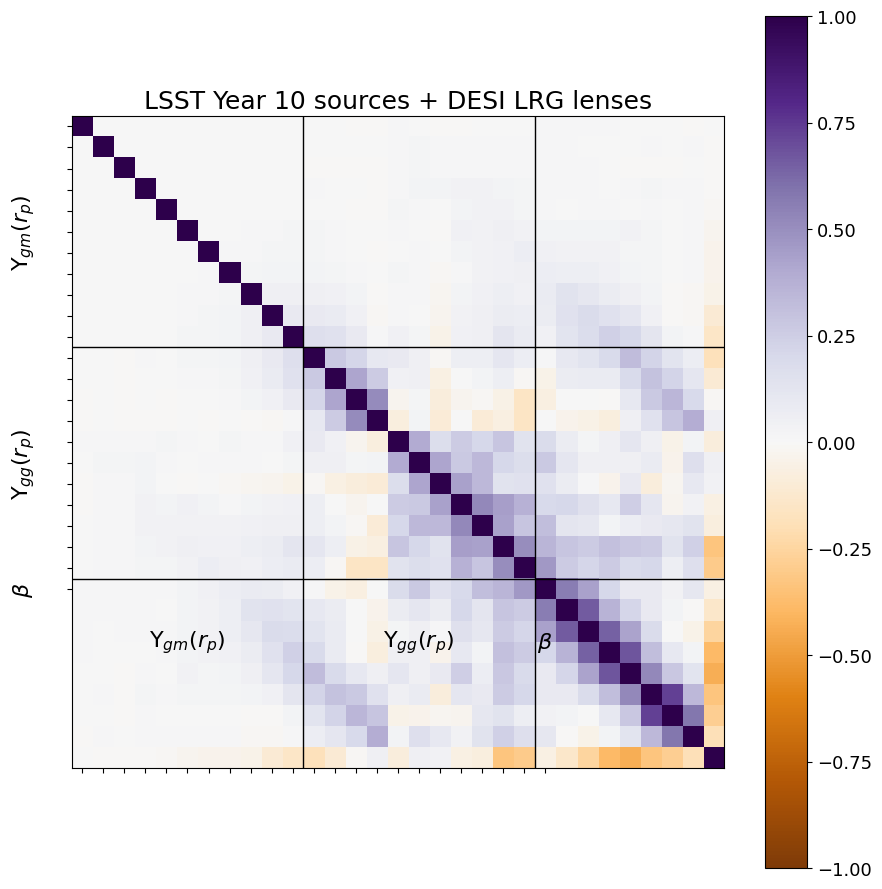

In [7]:
cmap = plt.get_cmap('PuOr')

# Quantity structure
bin_counts = [11, 11, 1]
labels_latex = [r'$\Upsilon_{gm}(r_p)$', r'$\Upsilon_{gg}(r_p)$', r'$\beta$']
group_positions = np.cumsum([0] + bin_counts)  # [0, 16, 32, 33]

# Tick positions only (no labels)
tick_positions = np.arange(sum(bin_counts))

# Plot
fig, ax = plt.subplots(figsize=(9, 9))
im = ax.imshow(corr, cmap=cmap, vmin=-1, vmax=1)

# Set ticks without labels
ax.set_xticks(tick_positions)
ax.set_yticks(tick_positions)
ax.set_xticklabels([''] * len(tick_positions), rotation=90, fontsize=11)
ax.set_yticklabels([''] * len(tick_positions), fontsize=11)

# Colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=13)

# Draw divider lines between groups
for i in range(1, len(group_positions) - 1):
    ax.axhline(group_positions[i] - 0.5, color='black', linewidth=1)
    ax.axvline(group_positions[i] - 0.5, color='black', linewidth=1)

# Add group labels on bottom and left, with larger font
for i, label in enumerate(labels_latex):
    start = group_positions[i]
    end = group_positions[i + 1]
    center = (start + end - 1) / 2
    ax.text(center, len(tick_positions) + 1.5, label,
            ha='center', va='center', fontsize=16, fontweight='bold')
    ax.text(-2.8, center, label,
            ha='center', va='center', fontsize=16, fontweight='bold', rotation=90)

plt.title('LSST Year 10 sources + DESI LRG lenses', fontsize=18)
plt.tight_layout()
#plt.savefig('../plots/LSSTY10_DESI_corrmat_fixShapeNoise_crop.pdf')
plt.show()

Compute the Eg covariance from this joint-probes covariance.

In [8]:
Nsamps = 1000

#cov_test = np.delete(np.delete(cov,[12,13,14,27,28,29], axis=0), [12,13,14,27,28,29], axis=1)

EG_cov = eg.get_egcov(cov, params, rp_bin_edges, rp_bin_c, rp0, lens, src, Pimax, Nsamps, endfilename)

# Save this:
#np.savetxt('../txtfiles/sim_eg_cov_Y10_addSN_crop.dat', EG_cov)

maxchi= 6669.353003473356
end of upsgm binned
Eg_samp.shape= (15, 1000)
Eg_samp = [[0.35538095 0.35826561 0.35165128 ... 0.36780291 0.37454644 0.34570715]
 [0.36354446 0.35497212 0.3485195  ... 0.35694976 0.37616151 0.36358878]
 [0.36563168 0.35721201 0.36382863 ... 0.36762116 0.37257312 0.36711635]
 ...
 [0.3660058  0.36409706 0.36587861 ... 0.36784916 0.36795744 0.36332437]
 [0.36875702 0.3674189  0.36615768 ... 0.36995338 0.36745833 0.36238687]
 [0.36984809 0.36700786 0.36940106 ... 0.36576955 0.36454134 0.36371687]]


In [9]:
# Get the correlation:

eg_corr = np.zeros_like(EG_cov)
for i in range(0,15):
    for j in range(0,15):
        eg_corr[i,j] = EG_cov[i,j]/np.sqrt(EG_cov[i,i]*EG_cov[j,j])

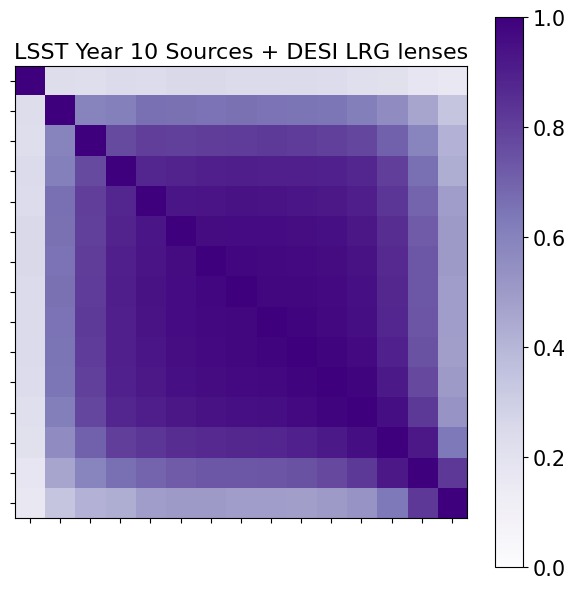

In [10]:
cmap = plt.get_cmap('Purples')
plt.figure(figsize=[6, 6])
plt.imshow(eg_corr, cmap=cmap, vmin=0, vmax=1)

# Keep tick positions but remove labels
num_bins = len(rp_bin_c)
tick_positions = np.arange(num_bins)

plt.xticks(tick_positions, [''] * num_bins, fontsize=15)
plt.yticks(tick_positions, [''] * num_bins, fontsize=15)

# Axis labels with units
#plt.xlabel(r"$r_p$ [$\mathrm{Mpc}/h$]", fontsize=16)
#plt.ylabel(r"$r_p$ [$\mathrm{Mpc}/h$]", fontsize=16)

# Colorbar
cbar2 = plt.colorbar()
cbar2.ax.tick_params(labelsize=15)
plt.title('LSST Year 10 Sources + DESI LRG lenses', fontsize=16)
plt.tight_layout()
#plt.savefig('../plots/EG_corr_LSSTY10_sims_vmin0.pdf')
plt.show()

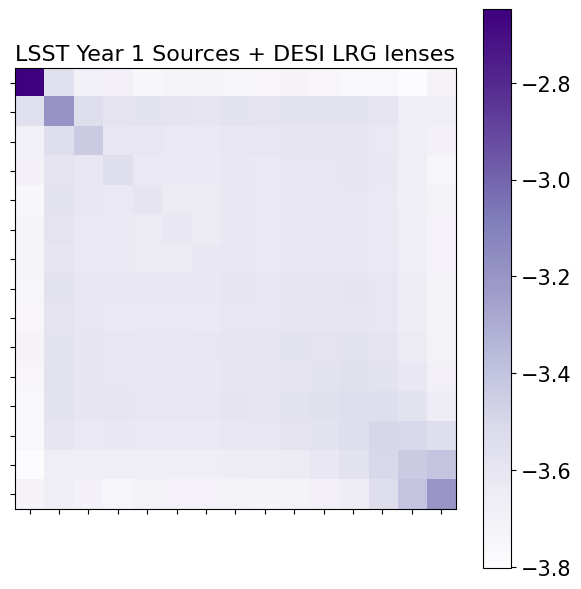

In [14]:
cmap = plt.get_cmap('Purples')
plt.figure(figsize=[6, 6])
plt.imshow(np.log10(EG_cov), cmap=cmap)

# Keep tick positions but remove labels
num_bins = len(rp_bin_c)
tick_positions = np.arange(num_bins)

plt.xticks(tick_positions, [''] * num_bins, fontsize=15)
plt.yticks(tick_positions, [''] * num_bins, fontsize=15)

# Axis labels with units
#plt.xlabel(r"$r_p$ [$\mathrm{Mpc}/h$]", fontsize=16)
#plt.ylabel(r"$r_p$ [$\mathrm{Mpc}/h$]", fontsize=16)

# Colorbar
cbar2 = plt.colorbar()
cbar2.ax.tick_params(labelsize=15)
plt.title('LSST Year 1 Sources + DESI LRG lenses', fontsize=16)
plt.tight_layout()
#plt.savefig('../plots/EG_corr_LSSTY1_sims.pdf')
plt.show()